# Competition 1

## the purpose of this notebook is yada yada yada

backround info on the topic

directions as to what we did (to be filled out later)

here are our steps

In [6]:
# importing proper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn


Here is the data dictionary in used as a reference of column names.
![Variable Dictionary](data_dictionary.PNG)

In [7]:
# For reproducability purposes we moved the read excel function to a import.py file
# If needed, we can reimport the file as a df just by calling  data_import() and the name of the excel file

#Import head of the data set using the import.py file
from Import import data_import
df=data_import('Competition1_raw_data.xlsx')
df.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10,9.5,8.5,11.87,122,1,3.43,...,10600000,51.345,470,12719,11560,301,690,62,117,139
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8,10,8,7.25,259,0,-1.62,...,2400000,25.936,791,21792,19585,510,1120,71,242,237
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7,14,12,6.7,90,1,-1.24,...,5000000,7.378,201,5262,4785,128,325,61,33,60
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16,14,12.39,209,1,-0.91,...,4500000,8.526,328,8259,7574,177,509,80,59,110
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21,21,19,56.6,80,1,0.07,...,8250000,632.298,572,14830,13176,336,720,67,149,167


In [8]:
df1=data_import('Competition1_raw_data.xlsx')


## let's do some prelimanry EDA to get a sense of what we are dealing with

## First, let's look at some characteristics including data types, count, and simple distributions

# let's look at column values and their types
df.info()

Hmm, every column is classified as an object. We know that some columns, like C1 should be at least an integer. let's look at a couple of columns to see if they all share a common source error.

In [9]:
df['C1'].value_counts()

-      22
93     15
84     14
77     13
92     13
112    12
91     12
119    12
85     11
78     10
100    10
76     10
104    10
111    10
94     10
98      9
105     9
79      8
147     7
140     7
89      7
83      7
70      7
90      7
72      7
106     7
107     7
124     7
118     6
133     6
       ..
161     1
506     1
153     1
658     1
131     1
203     1
206     1
257     1
25      1
251     1
243     1
307     1
241     1
240     1
237     1
234     1
233     1
230     1
227     1
207     1
226     1
225     1
736     1
223     1
222     1
218     1
217     1
215     1
213     1
520     1
Name: C1, Length: 245, dtype: int64

In [10]:
df = df.replace('-', np.NaN)

AS OF NOW, WE HAVE LOADED A DATAFRAME AND REPLACED ALL "-" WITH NAN VALUES.

In [11]:
df.dtypes

I1          object
I2          object
I3          object
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2         float64
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
dtype: object

In [12]:
df.iloc[:,14:19]

,T1,T2,T3,T4,T5
0,470.0,12719.0,11560.0,301.0,690.0
1,791.0,21792.0,19585.0,510.0,1120.0
2,201.0,5262.0,4785.0,128.0,325.0
3,328.0,8259.0,7574.0,177.0,509.0
4,572.0,14830.0,13176.0,336.0,720.0
5,510.0,17999.0,13934.0,328.0,815.0
6,495.0,15758.0,13953.0,379.0,698.0
7,334.0,11226.0,10056.0,276.0,-1.0
8,620.0,14813.0,13463.0,335.0,917.0
9,385.0,9134.0,8107.0,198.0,459.0


In [13]:
df["T1"]

0      470.0
1      791.0
2      201.0
3      328.0
4      572.0
5      510.0
6      495.0
7      334.0
8      620.0
9      385.0
10     332.0
11     253.0
12     206.0
13     416.0
14     624.0
15     586.0
16     269.0
17     391.0
18     528.0
19     512.0
20     473.0
21     591.0
22     279.0
23     248.0
24     263.0
25     259.0
26     499.0
27     527.0
28     641.0
29     403.0
       ...  
652    437.0
653    458.0
654    717.0
655    461.0
656    436.0
657    321.0
658    441.0
659    374.0
660    323.0
661    766.0
662    515.0
663    575.0
664    263.0
665    492.0
666    501.0
667    210.0
668    440.0
669    285.0
670    529.0
671    275.0
672    554.0
673    409.0
674    335.0
675    518.0
676    434.0
677    537.0
678    496.0
679    335.0
680    256.0
681    413.0
Name: T1, Length: 682, dtype: float64

In [14]:
for col in df.columns["T1","T2","T3","T4","T5"]:

    df[col].fillna(df[col].median(), inplace=True)
    

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [65]:
df["T1"]

0      470.0
1      791.0
2      201.0
3      328.0
4      572.0
5      510.0
6      495.0
7      334.0
8      620.0
9      385.0
10     332.0
11     253.0
12     206.0
13     416.0
14     624.0
15     586.0
16     269.0
17     391.0
18     528.0
19     512.0
20     473.0
21     591.0
22     279.0
23     248.0
24     263.0
25     259.0
26     499.0
27     527.0
28     641.0
29     403.0
       ...  
652    437.0
653    458.0
654    717.0
655    461.0
656    436.0
657    321.0
658    441.0
659    374.0
660    323.0
661    766.0
662    515.0
663    575.0
664    263.0
665    492.0
666    501.0
667    210.0
668    440.0
669    285.0
670    529.0
671    275.0
672    554.0
673    409.0
674    335.0
675    518.0
676    434.0
677    537.0
678    496.0
679    335.0
680    256.0
681    413.0
Name: T1, Length: 682, dtype: float64

In [82]:
names = []
#### create an empty list named `val` for # of null values in each column
val = []

#### create a for loop iterating each `col` through `df.columns`
for col in df.columns:

    #### add column name `col` to `names`
    names.append(col)
    #### add # of null values to `val`
    #### you can get # of null values for column `c` as `df[c].isnull().sum()`
    val.append(df[col].isnull().sum())
    #### print out results as (column_name, # of null values in column_name)
    #### Note that `col` is the current column_name in iteration
    #### and you should retrieve the # of null values in column_name as the last element in `val`
    #### hint: the last element in a list l is: l[-1]
    print("Number of missing values:", names[-1],val[-1],"""     """, "Percentage of missing values:", names[-1], round((val[-1]/682)*100))
  


Number of missing values: I1 0       Percentage of missing values: I1 0.0
Number of missing values: I2 0       Percentage of missing values: I2 0.0
Number of missing values: I3 8       Percentage of missing values: I3 1.0
Number of missing values: P(IPO) 5       Percentage of missing values: P(IPO) 1.0
Number of missing values: P(H) 10       Percentage of missing values: P(H) 1.0
Number of missing values: P(L) 10       Percentage of missing values: P(L) 1.0
Number of missing values: P(1Day) 22       Percentage of missing values: P(1Day) 3.0
Number of missing values: C1 22       Percentage of missing values: C1 3.0
Number of missing values: C2 22       Percentage of missing values: C2 3.0
Number of missing values: C3 36       Percentage of missing values: C3 5.0
Number of missing values: C4 22       Percentage of missing values: C4 3.0
Number of missing values: C5 6       Percentage of missing values: C5 1.0
Number of missing values: C6 6       Percentage of missing values: C6 1.0
Numbe

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa394aacb70>,
      dtype=object)

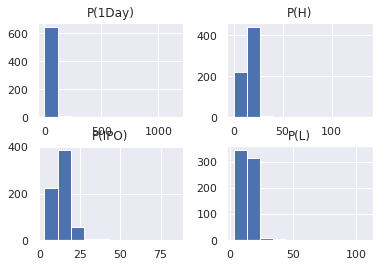

In [69]:
df.iloc[:,2:7].hist()

In [61]:
count = df["T5"]-df["T2"]
count
df["T5"].dtype
    

dtype('float64')